Problem Statement 1:-

Create a popularity based recommender system at a genre level.
User will input a genre (g), minimum ratings threshold (t) for a movie and no. of recommendations(N) for which it should be recommended top N movies
which are most popular within that genre (g) ordered by ratings in descending
order where each movie has at least (t) reviews

Genre (g) : Comedy

Minimum reviews threshold (t) : 100

Num recommendations (N) : 5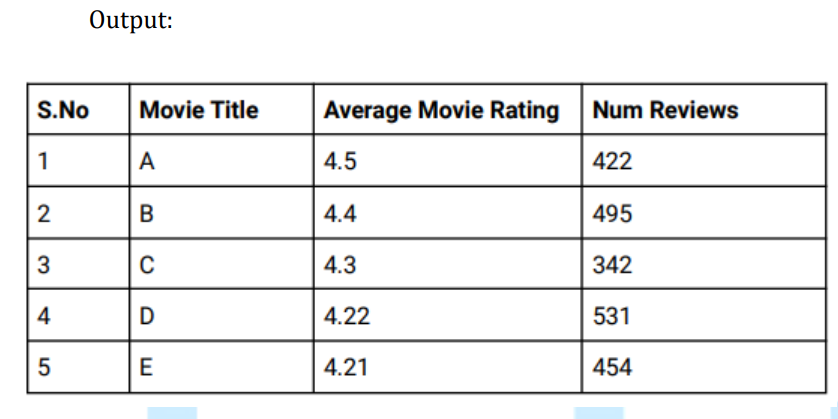

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
#from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors
#from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Edu Midterm Movie/movies.csv')
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df.isnull().sum()

,0
movieId,0
title,0
genres,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [5]:
df['genres'].value_counts()

,count
genres,
Drama,1385
Comedy,826
Comedy|Drama,465
Drama|Romance,421
Comedy|Romance,363
...,...
Animation|Children|Comedy|Musical|Western,1
Action|Adventure|Children|Comedy|Mystery,1
Action|Comedy|Crime|Drama|Horror|Thriller,1


In [6]:
#seperate the columns genres with delimeter Adventure|Animation|Children|Comedy|Fantasy

df['genres'] = df['genres'].astype(str)
df['genres'] = df['genres'].str.split("|")
df

#converterd all entries into a list

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),"[Animation, Children, Comedy]"
10325,146878,Le Grand Restaurant (1966),[Comedy]
10326,148238,A Very Murray Christmas (2015),[Comedy]
10327,148626,The Big Short (2015),[Drama]


In [7]:
#to do one hot encoding for lists as entries in a column

#from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
df_genres = pd.DataFrame(mlb.fit_transform(df['genres']), columns=mlb.classes_, index=df.index )
df_genres

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10324,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10325,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10326,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10327,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df_movie_hot = pd.concat([df, df_genres], axis=1)
df_movie_hot.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),[Comedy],0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_movie_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movieId             10329 non-null  int64 
 1   title               10329 non-null  object
 2   genres              10329 non-null  object
 3   (no genres listed)  10329 non-null  int64 
 4   Action              10329 non-null  int64 
 5   Adventure           10329 non-null  int64 
 6   Animation           10329 non-null  int64 
 7   Children            10329 non-null  int64 
 8   Comedy              10329 non-null  int64 
 9   Crime               10329 non-null  int64 
 10  Documentary         10329 non-null  int64 
 11  Drama               10329 non-null  int64 
 12  Fantasy             10329 non-null  int64 
 13  Film-Noir           10329 non-null  int64 
 14  Horror              10329 non-null  int64 
 15  IMAX                10329 non-null  int64 
 16  Musical             10

In [10]:
df_movie_hot.drop('genres', axis = 1, inplace = True)
df_movie_hot.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_rating = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Edu Midterm Movie/ratings.csv')
df_rating.sort_values('movieId', inplace = True)
df_rating.head()

,userId,movieId,rating,timestamp
19960,158,1,4.5,1241296244
76418,536,1,3.0,860417689
76243,534,1,4.0,916850069
76000,532,1,3.0,1440345516
75826,531,1,5.0,1447661542


In [12]:
dfr_count = df_rating.copy()

In [13]:
dfr_count.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [14]:
#making a column for average rating of each movie
dfr_count['avg_rating'] = dfr_count.groupby('movieId')['rating'].transform('mean')
dfr_count.head()

,userId,movieId,rating,timestamp,avg_rating
19960,158,1,4.5,1241296244,3.907328
76418,536,1,3.0,860417689,3.907328
76243,534,1,4.0,916850069,3.907328
76000,532,1,3.0,1440345516,3.907328
75826,531,1,5.0,1447661542,3.907328


In [15]:
#storing number of entries of movieId in a column

total_rating_count  = dfr_count['movieId'].value_counts()
dfr_count['Total rating count'] = dfr_count['movieId'].map(total_rating_count)
#dfr.drop('rating_count', axis =1, inplace = True)

dfr_count.head()

,userId,movieId,rating,timestamp,avg_rating,Total rating count
19960,158,1,4.5,1241296244,3.907328,232
76418,536,1,3.0,860417689,3.907328,232
76243,534,1,4.0,916850069,3.907328,232
76000,532,1,3.0,1440345516,3.907328,232
75826,531,1,5.0,1447661542,3.907328,232


In [16]:
#making seperate variable for number of ratings of each movie ID
#pd.DataFrame(total_rating_count).sort_values('movieId')

In [17]:
# dataframe of Movie rating, not respecting User ID
dfrc_no_u = dfr_count.drop_duplicates(subset = 'movieId', keep = 'first')
print(dfrc_no_u.sort_values(by = ['userId', 'movieId']).head())
dfrc_no_u.info()

     userId  movieId  rating   timestamp  avg_rating  Total rating count
54        1     1287     4.5  1217897783    4.062500                  48
70        1     2542     4.5  1217897667    3.986486                  74
100       1     8825     2.5  1217896490    2.500000                   1
196       3      532     3.0   841484049    3.478261                  23
245       4      940     5.0   950323317    4.000000                  24
<class 'pandas.core.frame.DataFrame'>
Index: 10325 entries, 19960 to 70604
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   userId              10325 non-null  int64  
 1   movieId             10325 non-null  int64  
 2   rating              10325 non-null  float64
 3   timestamp           10325 non-null  int64  
 4   avg_rating          10325 non-null  float64
 5   Total rating count  10325 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 564.6 KB


In [18]:
dfrc_no_u.head()

,userId,movieId,rating,timestamp,avg_rating,Total rating count
19960,158,1,4.5,1241296244,3.907328,232
56917,410,2,3.0,1146174931,3.353261,92
33320,232,3,3.0,1277839361,3.189655,58
68404,465,4,1.5,1097880405,2.818182,11
11855,107,5,3.0,958161374,3.250000,62


In [19]:
#making a variable in case avg_rating_count goes Nan after merging

avg_rating_count = dfr_count['avg_rating'].value_counts()
avg_rating_count # series

,count
avg_rating,
3.500000,2894
3.000000,2492
4.000000,2002
2.500000,1386
3.750000,1202
...,...
0.800000,5
4.900000,5
4.625000,4


In [20]:
# setting index so no row gets mixed, deleted
dfrc_no_u = dfrc_no_u.set_index('movieId')
df_movie_hot = df_movie_hot.set_index('movieId')

In [21]:
print(dfrc_no_u['avg_rating'].isnull().sum())

0


In [22]:
#Dataframe for 1st problem statement
df_r_g_mov1= dfrc_no_u.merge(df_movie_hot, left_index=True, right_index=True, how='outer')
df_r_g_mov1.head()

,userId,rating,timestamp,avg_rating,Total rating count,title,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,158.0,4.5,1.241296e+09,3.907328,232.0,Toy Story (1995),0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,410.0,3.0,1.146175e+09,3.353261,92.0,Jumanji (1995),0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,232.0,3.0,1.277839e+09,3.189655,58.0,Grumpier Old Men (1995),0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,465.0,1.5,1.097880e+09,2.818182,11.0,Waiting to Exhale (1995),0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,107.0,3.0,9.581614e+08,3.250000,62.0,Father of the Bride Part II (1995),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_r_g_mov1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10329 entries, 1 to 149532
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   userId              10325 non-null  float64
 1   rating              10325 non-null  float64
 2   timestamp           10325 non-null  float64
 3   avg_rating          10325 non-null  float64
 4   Total rating count  10325 non-null  float64
 5   title               10329 non-null  object 
 6   (no genres listed)  10329 non-null  int64  
 7   Action              10329 non-null  int64  
 8   Adventure           10329 non-null  int64  
 9   Animation           10329 non-null  int64  
 10  Children            10329 non-null  int64  
 11  Comedy              10329 non-null  int64  
 12  Crime               10329 non-null  int64  
 13  Documentary         10329 non-null  int64  
 14  Drama               10329 non-null  int64  
 15  Fantasy             10329 non-null  int64  
 16  Film-Noi

Output1:-

Problem Statement 1:-

Create a popularity based recommender system at a genre level. User will input a genre (g), minimum ratings threshold (t) for a movie and no. of recommendations(N) for which it should be recommended top N movies which are most popular within that genre (g) ordered by ratings in descending order where each movie has at least (t) reviews

In [24]:
df_popular = df_r_g_mov1.drop('userId', axis = 1)
df_popular.head()

,rating,timestamp,avg_rating,Total rating count,title,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.5,1.241296e+09,3.907328,232.0,Toy Story (1995),0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1.146175e+09,3.353261,92.0,Jumanji (1995),0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1.277839e+09,3.189655,58.0,Grumpier Old Men (1995),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1.5,1.097880e+09,2.818182,11.0,Waiting to Exhale (1995),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,3.0,9.581614e+08,3.250000,62.0,Father of the Bride Part II (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
mlb.classes_

array(['(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'], dtype=object)

Solution:- PROBLEM STATEMENT 1

Create a popularity based recommender system at a genre level.

User will input a genre (g),

minimum count of total ratings threshold (t) for a movie and

no. of recommendations(N)

for which it should be recommended top N movies which are most popular (highest avg_rating) within that genre (g) ordered by ratings in descending order where each movie has at least (t) reviews

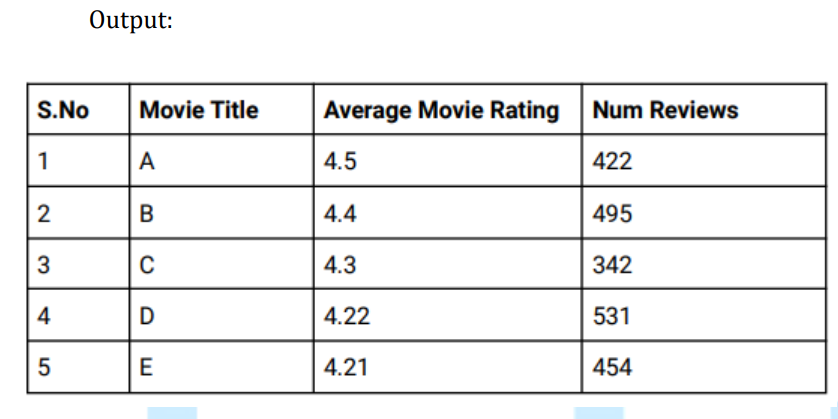



In [27]:
# logic of problem statement 1
print('Genres List ',mlb.classes_)
g = input('Type Genre :').strip().title()
t = int(input("Minimum number of Reviews :"))
N = int(input("Number of recommendations you want :"))

recommended_table = pd.DataFrame()

if g in mlb.classes_:
  recommended_table = df_popular[df_popular[g] == 1]
  recommended_table = recommended_table.sort_values(by = ['avg_rating'], ascending = False)
  recommended_table = recommended_table[recommended_table['Total rating count'] >= t]
  if recommended_table.empty:
    print(f"No movies found for genre '{g}' with at least {t} reviews.")
  else:
    # Sort by average rating in descending order
    recommended_table = recommended_table.sort_values(by = ['avg_rating'], ascending = False)

    # Select top N movies
    recommended_table = recommended_table.head(N)
    #recommended_table.to_csv(f'recommended_table1{g}.csv')
# Prepare the recommendation table
    rc_table = {
            'Sr.No': range(1, len(recommended_table) + 1),
            'Movie Title': recommended_table['title'],
            'Average Movie Rating': recommended_table['avg_rating'],
            'Num Reviews': recommended_table['Total rating count']
        }

    rc_table_df = pd.DataFrame(rc_table).reset_index()
    rc_table_df.drop('movieId', axis = 1, inplace = True)
    #rc_table_df.drop('index', axis = 1, inplace = True)
    rc_table_df.set_index('Sr.No', inplace = True)
    #rc_table_df.to_csv(f'recommended_table1{g}.csv')

else:
  print('Genre not found')

rc_table_df

Genres List  ['(no genres listed)' 'Action' 'Adventure' 'Animation' 'Children' 'Comedy'
 'Crime' 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror' 'IMAX'
 'Musical' 'Mystery' 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']
Type Genre :Drama
Minimum number of Reviews :10
Number of recommendations you want :3


,Movie Title,Average Movie Rating,Num Reviews
Sr.No,,,
1,Paths of Glory (1957),4.5,19.0
2,Kundun (1997),4.5,10.0
3,All Quiet on the Western Front (1930),4.5,13.0


Problem Statement 2:

Create a content based recommender system which recommends top N movies
based on similar movie(m) genres.
Example:
Input:
Movie Title (t) : Toy Story
Num recommendations (N) : 5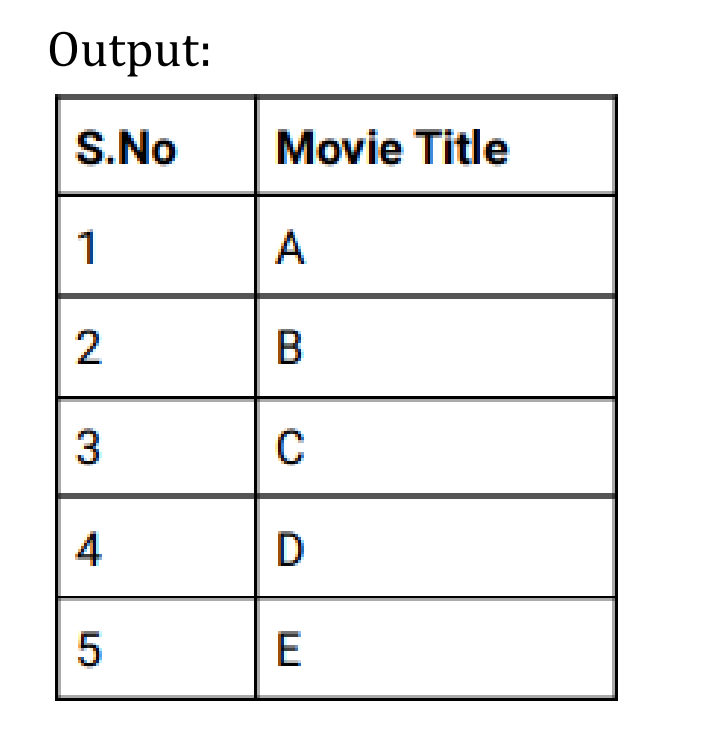

In [28]:
"""Problem 2:-
Create a content based recommender system which recommends top N movies based on similar movie(m) genres.
Example: Input: Movie Title (t) : Toy Story Num recommendations (N) : 5 """

#print(df_popular['title'])
T = input('Name movie for search :').strip().title()
N = int(input('Number of recommendations'))

if T in df_popular['title'].values:
  movie_row = df_popular[df_popular['title'] == T] # all cols of movie title T
  #print('movie_row', movie_row)
  genre_cols = df_popular.columns[6:] # genre columns start from 6
  genres_of_movie = genre_cols[(movie_row[genre_cols]==1).values[0]]

  """movie_row[genre_cols] gives a DataFrame with only the genre columns for the movie.
  (movie_row[genre_cols] == 1) returns a DataFrame of the same shape, but with True where the genre value is 1 and False otherwise.
  .values converts this boolean DataFrame to a NumPy array.
  values[0] extracts the first (and only) row of this array, which is a 1-dimensional boolean array.
  genre_cols[...] uses this boolean array to filter the columns."""

  print("Movie_row with genre cols", genres_of_movie.tolist())

  # Filter movies that have at least one of the same genres
  filtered_movies = df_popular[df_popular[genres_of_movie].sum(axis=1) > 0]

  # Count the number of matching genres for each movie
  filtered_movies['matching_genres_count'] = filtered_movies[genres_of_movie].sum(axis=1)

  # Sort movies by the number of matching genres in descending order
  sorted_movies = filtered_movies.sort_values(by='matching_genres_count', ascending=False)

  # Get the titles of these movies
  similar_genre_movies = sorted_movies[['title', 'matching_genres_count', 'avg_rating']].reset_index(drop=True)
  similar_genre_movies1 = similar_genre_movies.head(N).sort_values(by = 'avg_rating', ascending = False).reset_index(drop = True)


  print(f"Movies with similar genres to '{T}':")
 # print("Similar movies \n ", similar_genre_movies )
  #print(f"Similar movie N \n ", similar_genre_movies1)


table2_ = {"Sr.No" : range(1, len(similar_genre_movies1) + 1),
           "Movie Title" :similar_genre_movies1['title']}
df_table2 = pd.DataFrame(table2_).set_index('Sr.No')
df_table2

Name movie for search :Kundun (1997)	
Number of recommendations5
Movie_row with genre cols ['Drama']
Movies with similar genres to 'Kundun (1997)':


,Movie Title
Sr.No,
1,"Child, The (L'enfant) (2005)"
2,Waiting to Exhale (1995)
3,They Call Me Mister Tibbs! (1970)
4,Lacombe Lucien (1974)
5,Where the Red Fern Grows (1974)


Problem Statement :- 3

Create a collaborative based recommender system which recommends top N
movies based on “K” similar users for a target user “u”
Example:

Input:
x`
UserID : 1

Num recommendations(N) : 5

In [29]:
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Edu Midterm Movie/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Edu Midterm Movie/ratings.csv')

In [30]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [31]:
ratings

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [32]:
data = pd.merge(ratings, movies, on = 'movieId')

In [33]:
data.sort_values(by = 'movieId')

,userId,movieId,rating,timestamp,title,genres
19960,158,1,4.5,1241296244,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
76418,536,1,3.0,860417689,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
76243,534,1,4.0,916850069,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
76000,532,1,3.0,1440345516,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
75826,531,1,5.0,1447661542,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
70603,475,148238,3.0,1451213043,A Very Murray Christmas (2015),Comedy
66814,458,148626,4.0,1452014749,The Big Short (2015),Drama
86152,576,148626,4.5,1451687664,The Big Short (2015),Drama
105338,668,148626,4.5,1451148148,The Big Short (2015),Drama


In [34]:
# this reduces rows of userID to one row each, without reducing that user ID's total all ratings for movies
#user_item_matrix = data.pivot_table(index='userId', columns='title', values='rating').fillna(0)

user_item_matrix = data.pivot_table(columns = 'title', index = 'userId', values = 'rating' )

user_item_matrix = user_item_matrix.fillna(0)

In [35]:
user_item_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0


In [36]:
user_item_matrix_T = user_item_matrix.T
user_item_matrix_T

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loudQUIETloud: A Film About the Pixies (2006),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
xXx: State of the Union (2005),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


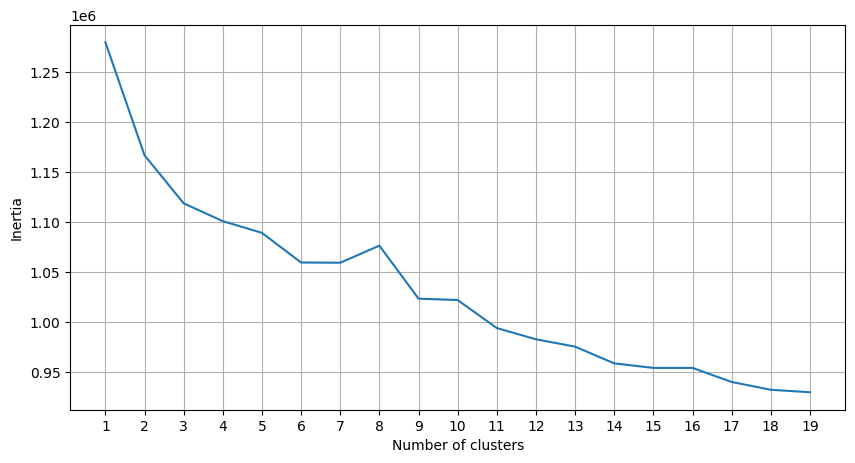

In [109]:
from sklearn.cluster import KMeans

inertia_list = []
for num_clusters in np.arange(1, 20):
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(user_item_matrix)
  inertia_list.append(kmeans.inertia_)
#	Kmeans.inertia_ :- will give SS distance of data points for specific n_clusters(number of clusters defined)
#Plotting the graph for above
#elbow method
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,20), inertia_list)
plt.xticks(np.arange(1,20))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [49]:
inertia_list

[1279966.6836639224,
 1166777.7029086608,
 1119562.7345550773,
 1112994.959756683,
 1070781.2751107647,
 1058679.7436797274,
 1029435.943976129,
 1045479.4377397358,
 1004351.3500440232,
 1011047.4797736006,
 1023071.375977208,
 1019456.6700111151,
 981654.0278455951,
 978087.4763489894,
 964484.1355028504,
 949228.5038807216,
 946871.0200299026,
 958769.4723318398,
 915880.4766339225]

In [110]:
kmeans_model = KMeans(n_clusters = 10)
kmeans_model.fit(user_item_matrix)

KMeans(n_clusters=10)

In [112]:
# Assign each movie (column in user_item_matrix) to a cluster
user_clusters = pd.DataFrame({'UserID': user_item_matrix.index, 'Cluster': kmeans_model.labels_})

# Group movies by clusters for easy access
cluster_dict = user_clusters.groupby('Cluster')['UserID'].apply(list).to_dict()

In [98]:
user_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   UserID   668 non-null    int64
 1   Cluster  668 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 8.0 KB


In [118]:
# Function to get recommendations based on user ID
def get_recommendations(userid, n_recommendations):
    # Check if the user exists in the clusters DataFrame
    if userid not in user_clusters['UserID'].values:
        print(f"UserID '{userid}' not found in the dataset.")
        return pd.DataFrame()

    # Get the cluster for the given user ID
    user_cluster = user_clusters.loc[user_clusters['UserID'] == userid, 'Cluster'].values[0]

    # Get users in the same cluster excluding the input user
    cluster_users = [user for user in cluster_dict[user_cluster] if user != userid]

    # Check if there are other users in the same cluster
    if not cluster_users:
        print(f"No other users found in the same cluster as UserID '{userid}'.")
        return pd.DataFrame()

    # Get average ratings of movies within the same cluster
    cluster_ratings = user_item_matrix.loc[cluster_users].mean().sort_values(ascending=False)

    # Get the top N recommended movies
    recommended_movies = cluster_ratings.head(n_recommendations)

 # Return only the recommended movie titles (index) # Return as a table of movie titles
    return pd.DataFrame(recommended_movies.index.tolist(), columns = ['Movies recommeded'])

Enter a UserID: 44
Number of recommendations: 5

Recommended Movies Based on Your Input:
                                    Movie recommeded
0                                 Matrix, The (1999)
1  Raiders of the Lost Ark (Indiana Jones and the...
2  Star Wars: Episode V - The Empire Strikes Back...
3                                Forrest Gump (1994)
4          Star Wars: Episode IV - A New Hope (1977)


In [120]:
# Example usage
userid = int(input("Enter a UserID: "))
n_recommendations = int(input("Number of recommendations: "))
recommendations = get_recommendations(userid, n_recommendations)

print("\nRecommended Movies Based on Your Input:")
print(recommendations)

Enter a UserID: 7
Number of recommendations: 10

Recommended Movies Based on Your Input:
                                    Movie recommeded
0                                 Matrix, The (1999)
1  Raiders of the Lost Ark (Indiana Jones and the...
2  Star Wars: Episode V - The Empire Strikes Back...
3          Star Wars: Episode IV - A New Hope (1977)
4                                Forrest Gump (1994)
5                   Shawshank Redemption, The (1994)
6                          Back to the Future (1985)
7  Star Wars: Episode VI - Return of the Jedi (1983)
8                                Pulp Fiction (1994)
9  Lord of the Rings: The Fellowship of the Ring,...
